In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
estado = pd.read_csv("perfil_eleitor_secao_2022_TO.csv", 
                 usecols = '''NR_ZONA NR_SECAO NM_MUNICIPIO DS_FAIXA_ETARIA DS_ESTADO_CIVIL DS_GRAU_ESCOLARIDADE 
                 QT_ELEITORES_INC_NM_SOCIAL QT_ELEITORES_PERFIL'''.split(),
                 sep=";", on_bad_lines = 'skip', encoding='Latin 1')


In [12]:
municipio = estado.query('NM_MUNICIPIO == "PALMAS"')
municipio = municipio.drop(columns = 'NM_MUNICIPIO')

In [13]:
municipio.sample(20)


,NR_ZONA,NR_SECAO,DS_ESTADO_CIVIL,DS_FAIXA_ETARIA,DS_GRAU_ESCOLARIDADE,QT_ELEITORES_PERFIL,QT_ELEITORES_INC_NM_SOCIAL
344076,29,193,VIÚVO,65 a 69 anos,ENSINO FUNDAMENTAL COMPLETO,2,0
580120,29,543,SOLTEIRO,18 anos,ENSINO FUNDAMENTAL INCOMPLETO,1,0
455522,29,94,CASADO,35 a 39 anos,ENSINO MÉDIO INCOMPLETO,1,0
538551,29,327,SOLTEIRO,40 a 44 anos,SUPERIOR COMPLETO,2,0
456626,29,97,CASADO,65 a 69 anos,ENSINO MÉDIO COMPLETO,1,0
521966,29,304,SOLTEIRO,25 a 29 anos,ENSINO MÉDIO COMPLETO,3,0
564522,29,359,CASADO,35 a 39 anos,ENSINO MÉDIO COMPLETO,1,0
465792,29,223,SOLTEIRO,40 a 44 anos,ENSINO FUNDAMENTAL INCOMPLETO,1,0
539433,29,334,DIVORCIADO,45 a 49 anos,ENSINO MÉDIO INCOMPLETO,1,0
287486,29,571,VIÚVO,45 a 49 anos,ENSINO MÉDIO COMPLETO,1,0


In [14]:
faixa_etaria = municipio.groupby(['DS_FAIXA_ETARIA'])['QT_ELEITORES_PERFIL'].sum()
faixa_etaria

DS_FAIXA_ETARIA
100 anos ou mais                      2
16 anos                            1701
17 anos                            2531
18 anos                            3429
19 anos                            3837
20 anos                            4185
21 a 24 anos                      18399
25 a 29 anos                      24697
30 a 34 anos                      23719
35 a 39 anos                      24381
40 a 44 anos                      23499
45 a 49 anos                      19497
50 a 54 anos                      14838
55 a 59 anos                      11943
60 a 64 anos                       8407
65 a 69 anos                       5878
70 a 74 anos                       3708
75 a 79 anos                       2158
80 a 84 anos                        952
85 a 89 anos                        328
90 a 94 anos                         94
95 a 99 anos                         28
Inválido                              4
Name: QT_ELEITORES_PERFIL, dtype: int64

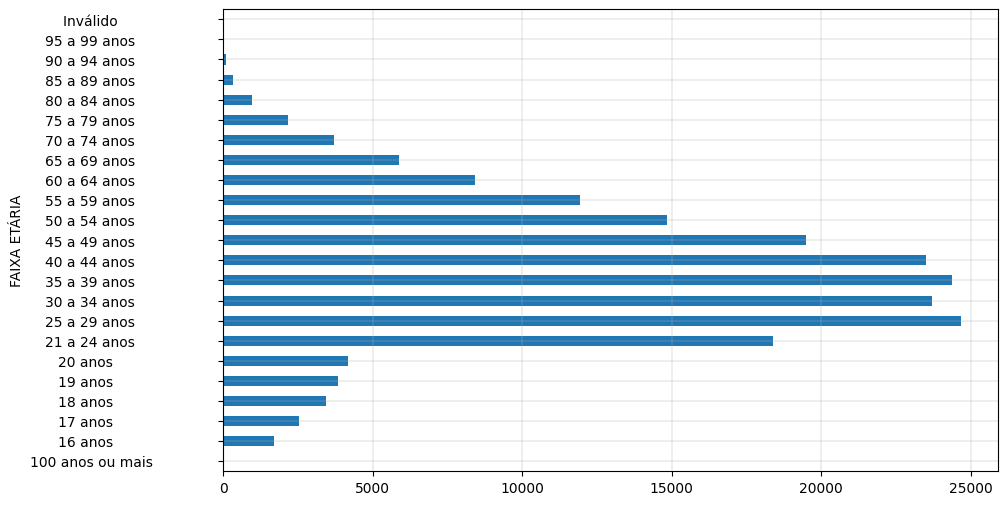

In [24]:
faixa_etaria.plot(kind='barh', figsize=(10,6))
plt.ylabel('FAIXA ETÁRIA')
plt.grid(linestyle = 'solid', linewidth = 0.3)

In [25]:
Jovem = faixa_etaria[1:8] 
Adulto = faixa_etaria[8:14] 
Idoso = faixa_etaria[14:22] 

In [26]:
faixa_idade = pd.DataFrame({'Palmas':[Jovem.sum(), Adulto.sum(), Idoso.sum() + int(faixa_etaria[0])]},
                        #somando idosos acima de 100 anos que estão no ínício
                        index = ['Jovens até 29 anos', 'Adultos', 'Idosos a partir de 60'])
faixa_idade

,Palmas
Jovens até 29 anos,58779
Adultos,117877
Idosos a partir de 60,21555


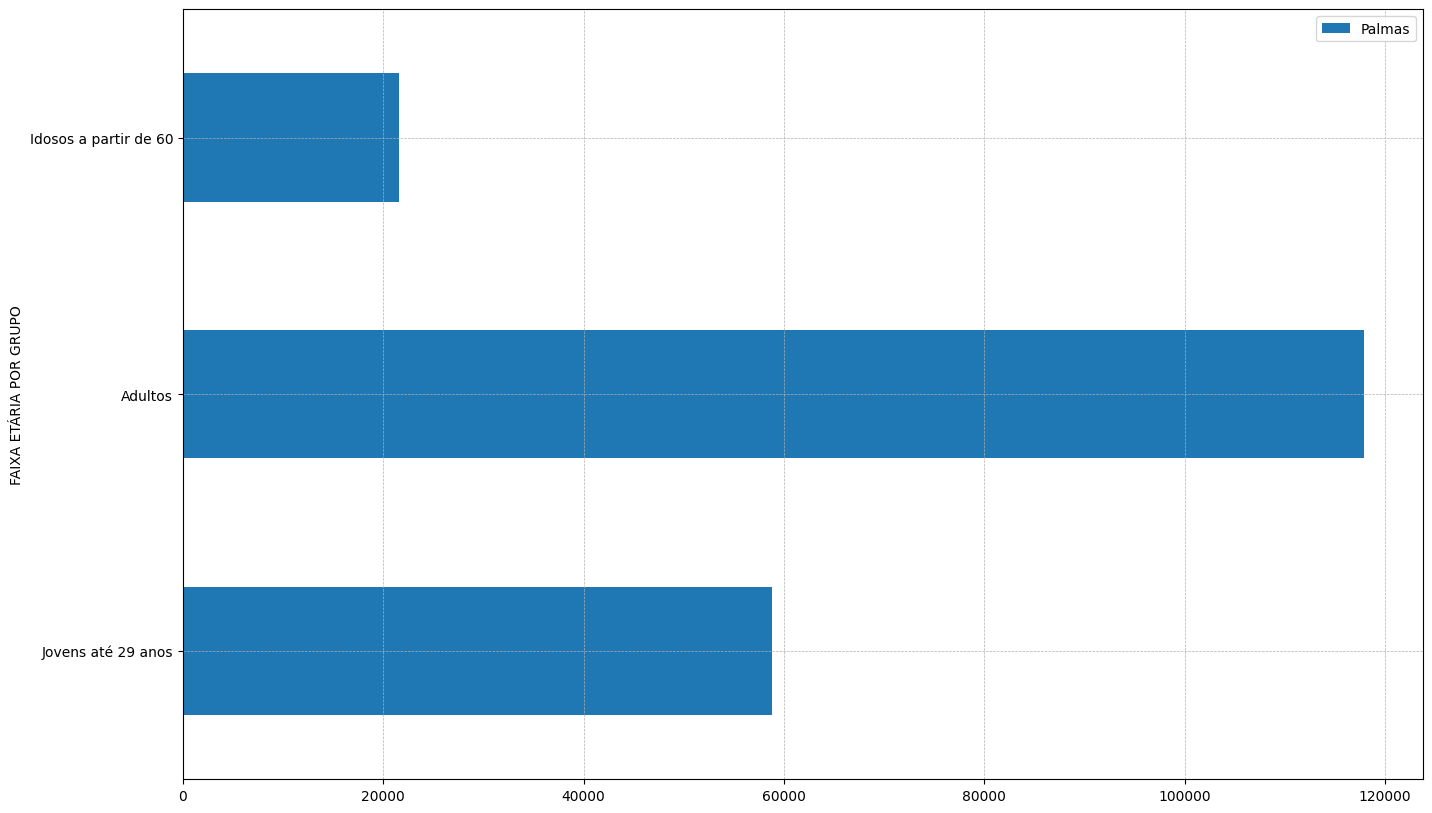

In [27]:
faixa_idade.plot(kind='barh', figsize=(16,10))
plt.ylabel('FAIXA ETÁRIA POR GRUPO')
plt.grid(linestyle = '--', linewidth = 0.5)

In [29]:
jovens = {}
for zona in municipio.NR_ZONA.unique():
    result = municipio.query('NR_ZONA == @zona').groupby('DS_FAIXA_ETARIA')['QT_ELEITORES_PERFIL'].sum()
    jovens[zona] = result[1:8].sum()
for zona in sorted(jovens, key=lambda x:jovens[x], reverse = True):
    print (f'Zona eleitoral {zona}: {jovens[zona]}')

Zona eleitoral 29: 58779


In [30]:
idosos = {}
for zona in municipio.NR_ZONA.unique():
    result = municipio.query('NR_ZONA == @zona').groupby('DS_FAIXA_ETARIA')['QT_ELEITORES_PERFIL'].sum()
    idosos[zona] = result[14:22].sum() + int(result[0])
for zona in sorted(idosos, key=lambda x:idosos[x], reverse = True):
    print (f'Zona eleitoral {zona}: {idosos[zona]}')

Zona eleitoral 29: 21555


# Estado Cívil

In [33]:
estado_civil = municipio.groupby('DS_ESTADO_CIVIL')['QT_ELEITORES_PERFIL'].sum().sort_values(ascending=False)
estado_civil 

DS_ESTADO_CIVIL
SOLTEIRO                  119150
CASADO                     64880
DIVORCIADO                  9543
VIÚVO                       3030
SEPARADO JUDICIALMENTE      1612
Name: QT_ELEITORES_PERFIL, dtype: int64

# Escolaridade

In [37]:
escolaridade = municipio.groupby(['DS_GRAU_ESCOLARIDADE'])['QT_ELEITORES_PERFIL'].sum().sort_values(ascending = False)
escolaridade


DS_GRAU_ESCOLARIDADE
ENSINO MÉDIO COMPLETO            63974
SUPERIOR COMPLETO                38255
ENSINO MÉDIO INCOMPLETO          34943
ENSINO FUNDAMENTAL INCOMPLETO    23182
SUPERIOR INCOMPLETO              23160
ENSINO FUNDAMENTAL COMPLETO       8639
LÊ E ESCREVE                      3917
ANALFABETO                        2145
Name: QT_ELEITORES_PERFIL, dtype: int64

# Nome Social

In [38]:
nome_social = municipio.groupby(['QT_ELEITORES_INC_NM_SOCIAL'])['QT_ELEITORES_PERFIL'].count()
nome_social[1]

36

In [39]:
nome_social = {}
for zona in municipio.NR_ZONA.unique():
    result = municipio.query('NR_ZONA == @zona').groupby('QT_ELEITORES_INC_NM_SOCIAL')['QT_ELEITORES_PERFIL'].count()
    nome_social[zona] = result[1]
for zona in sorted(nome_social, key=lambda x:nome_social[x], reverse = True):
    print (f'Zona eleitoral {zona}: {nome_social[zona]}')

Zona eleitoral 29: 36


In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [44]:
estado = pd.read_csv("bweb_1t_TO_051020221321.csv", 
                 usecols = '''NR_ZONA NR_SECAO NM_MUNICIPIO QT_COMPARECIMENTO QT_APTOS QT_COMPARECIMENTO 
                 QT_ABSTENCOES NR_VOTAVEL NM_VOTAVEL QT_VOTOS DS_CARGO_PERGUNTA'''.split(),
                 sep=";", on_bad_lines = 'skip', encoding='Latin 1')

In [49]:
municipio = estado.query('NM_MUNICIPIO == "PALMAS" and DS_CARGO_PERGUNTA == "Presidente"')
municipio = municipio.drop(columns = 'NM_MUNICIPIO DS_CARGO_PERGUNTA'.split())

In [52]:
municipio.sample(20)

,NR_ZONA,NR_SECAO,QT_APTOS,QT_COMPARECIMENTO,QT_ABSTENCOES,NR_VOTAVEL,NM_VOTAVEL,QT_VOTOS
322492,29,185,362,301,61,30,FELIPE D'AVILA,1
336599,29,272,358,310,48,12,CIRO GOMES,9
324122,29,194,336,284,52,22,JAIR BOLSONARO,152
304598,29,77,345,285,60,95,Branco,3
321524,29,179,250,207,43,22,JAIR BOLSONARO,110
345546,29,327,365,297,68,13,LULA,132
337166,29,275,396,316,80,13,LULA,132
380467,29,560,147,123,24,22,JAIR BOLSONARO,58
367169,29,470,246,189,57,15,SIMONE TEBET,3
381246,29,566,342,249,93,30,FELIPE D'AVILA,1


In [53]:
municipio.groupby('NM_VOTAVEL')['QT_VOTOS'].sum().sort_values(ascending = False)

NM_VOTAVEL
JAIR BOLSONARO         88034
LULA                   61252
SIMONE TEBET            5699
CIRO GOMES              4706
Nulo                    3190
Branco                  1567
SORAYA THRONICKE         529
FELIPE D'AVILA           502
PADRE KELMON              83
SOFIA MANZANO             40
LÉO PÉRICLES              36
CONSTITUINTE EYMAEL       33
VERA                      19
Name: QT_VOTOS, dtype: int64

In [54]:
votacao = {}
for zona in municipio.NR_ZONA.unique():
    result = municipio.query('NR_ZONA == @zona').groupby('NM_VOTAVEL')['QT_VOTOS'].sum()
    total = sum(result)
    votacao[zona] = {'Jair Bolsonaro': round(result["JAIR BOLSONARO"] / total * 100, 1),
                     'Lula': round(result["LULA"] / total * 100, 1), 
                     'Simone Tebet': round(result['SIMONE TEBET'] / total * 100, 1),
                     'Nulos':round(result['Nulo'] / total * 100, 1), 
                     'Brancos':round(result['Branco'] / total * 100, 1)
                    }
votacao = pd.DataFrame(votacao).transpose()
votacao

,Brancos,Jair Bolsonaro,Lula,Nulos,Simone Tebet
29,0.9,53.1,37.0,1.9,3.4


# Abstenções


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [14]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [29]:
estado = pd.read_csv("perfil_comparecimento_abstencao_2022.csv", 
                 usecols = '''NR_ZONA  NM_MUNICIPIO QT_COMPARECIMENTO QT_APTOS QT_COMPARECIMENTO 
                 QT_ABSTENCAO NR_TURNO'''.split(),
                 sep=";", on_bad_lines = 'skip', encoding='Latin 1')

In [32]:
abstencao_municipio = estado.query(f'NM_MUNICIPIO == "PALMAS"')

dados_primeiro_turno = abstencao_municipio.query('NR_TURNO == 1')
comparecimento_primeiro_turno = dados_primeiro_turno.QT_COMPARECIMENTO.sum()
abstencao_primeiro_turno = dados_primeiro_turno.QT_ABSTENCAO.sum()
total_eleitores_primeiro_turno = comparecimento_primeiro_turno + abstencao_primeiro_turno
comparecimento_primeiro_turno_pct = comparecimento_primeiro_turno / total_eleitores_primeiro_turno
abstencao_primeiro_turno_pct = abstencao_primeiro_turno / total_eleitores_primeiro_turno


dados_segundo_turno = abstencao_municipio.query('NR_TURNO == 2')
comparecimento_segundo_turno = dados_segundo_turno.QT_COMPARECIMENTO.sum()
if comparecimento_segundo_turno == 0:
    print(f"obs: Sem segundo turno na cidade Palmas nas eleições de 2022")
else:
    abstencao_segundo_turno = dados_segundo_turno.QT_ABSTENCAO.sum()
    total_eleitores_segundo_turno = comparecimento_segundo_turno + abstencao_segundo_turno
    comparecimento_segundo_turno_pct = comparecimento_segundo_turno / total_eleitores_segundo_turno
    abstencao_segundo_turno_pct = abstencao_segundo_turno / total_eleitores_segundo_turno 

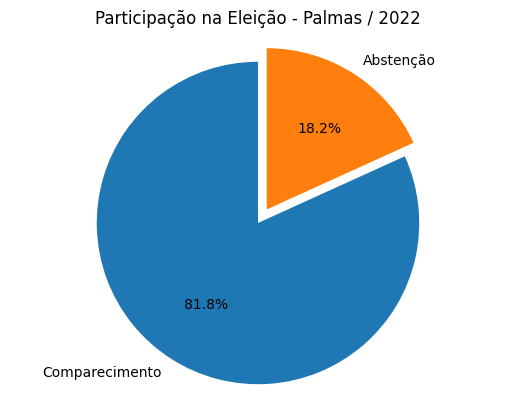

In [64]:
labels = ['Comparecimento', 'Abstenção']
sizes = [comparecimento_primeiro_turno, abstencao_primeiro_turno]
colors = ['#1f77b4', '#ff7f0e']
explode = (0.1, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  
plt.title('Participação na Eleição - Palmas / 2022')
plt.show()